In [13]:
using Plots

In [14]:
function golden_section(f, a, b, eps=0.01)
    Fi = (1+5^0.5)/2
    while true
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2
            a = x1
        else
            b = x2
        end
        if abs(b-a) < eps
            return (a+b)/2
        end
    end
end
function norm(a)
    su = 0 
    for i ∈ a
        su += i^2
    end
    return su^(1/2)
end
function dfdx(f, x,y, h)
    return (f(x+h,y)-f(x-h,y))/(2*h)
end
function dfdy(f, x,y, h)
    return (f(x,y+h)-f(x,y-h))/(2*h)
end
function evclid(a, b)
    return sum(a .* b)
end

evclid (generic function with 1 method)

In [15]:
function FR(f,start, eps, h)
    function nk_f(x, g)
        function nk_f2(a)
            return f((x-a*g)...)
        end
        return nk_f2
        
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_p = [0, 0]
    first = true
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        if !first
            betas = (norm(grad)^2/norm(pred_grad)^2)
            if betas <= 0
                betas = 0
            end
            p = grad + betas*pred_p
        else
            p = grad
            first = false
        end
        alpha = golden_section(nk_f(x_i, p), 0, 1)
        x_i1 = x_i-alpha*p
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_p = copy(p)
        pred_grad = copy(grad)
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

FR (generic function with 1 method)

In [16]:
function PR(f,start, eps, h)
    function nk_f(x, g)
        function nk_f2(a)
            return f((x-a*g)...)
        end
        return nk_f2
        
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_p = [0, 0]
    first = true
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        if !first
            betas =  (evclid(grad, grad-pred_grad)/norm(pred_grad)^2)
            if betas <= 0
                betas = 0
            end
            p = grad + betas*pred_p
        else
            p = grad
            first = false
        end
        alpha = golden_section(nk_f(x_i, p), 0, 1)
        x_i1 = x_i-alpha*p
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_p = copy(p)
        pred_grad = copy(grad)
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

PR (generic function with 1 method)

In [17]:
function Dicson(f,start, eps, h)
    function nk_f(x, g)
        function nk_f2(a)
            return f((x-a*g)...)
        end
        return nk_f2
        
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_p = [0, 0]
    first = true
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        if !first
            betas = (evclid(grad, grad)/evclid(pred_p, pred_grad))
            if betas <= 0
                betas = 0
            end
            p = grad + betas*pred_p
        else
            p = grad
            first = false
        end
        alpha = golden_section(nk_f(x_i, p), 0, 1)
        x_i1 = x_i-alpha*p
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_p = copy(p)
        pred_grad = copy(grad)
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

Dicson (generic function with 1 method)

In [18]:
function HS(f,start, eps, h)
    function nk_f(x, g)
        function nk_f2(a)
            return f((x-a*g)...)
        end
        return nk_f2
        
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_p = [0, 0]
    first = true
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        if !first
            betas = (evclid(grad, grad-pred_grad)/evclid(pred_p, grad-pred_grad))
            if betas <= 0
                betas = 0
            end
            p = grad + betas*pred_p
        else
            p = grad
            first = false
        end
        alpha = golden_section(nk_f(x_i, p), 0, 1)
        x_i1 = x_i-alpha*p
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_p = copy(p)
        pred_grad = copy(grad)
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

HS (generic function with 1 method)

In [19]:
function Dayan(f,start, eps, h)
    function nk_f(x, g)
        function nk_f2(a)
            return f((x-a*g)...)
        end
        return nk_f2
        
    end
    x_i = copy(start)
    hist = [copy(start)]
    pred_grad = [0.0, 0.0]
    pred_p = [0, 0]
    first = true
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        if !first
            betas = (evclid(grad, grad-pred_grad)/evclid(pred_p, grad-pred_grad))
            if betas <= 0
                betas = 0
            end
            p = grad + betas*pred_p
        else
            p = grad
            first = false
        end
        alpha = golden_section(nk_f(x_i, p), 0, 1)
        x_i1 = x_i-alpha*p
        x_i = x_i1
        push!(hist, copy(x_i))
        pred_p = copy(p)
        pred_grad = copy(grad)
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

Dayan (generic function with 1 method)

In [20]:
banan(x, y) = (x^2-y)^2+(x-1)^2

rastrigin(x, y) = 10 * 2 + x^2 - 10 * cos(2π * x) + y^2 - 10 * cos(2π * y)

schwefel(x, y) = 418.9829 * 2 - (x * sin(sqrt(abs(x))) + y * sin(sqrt(abs(y))))

xs1 = -10:1:10
ys1 = -10:1:10
xs2 = 410:1:430
ys2 = 410:1:430
start1 = [10., 10.]
start2 = [430., 430.]
starts = [start1, start1, start2]
func = [banan, rastrigin, schwefel]
func_names = ["banan", "rastrigin", "schwefel"]
opr = [[xs1, ys1], [xs1, ys1], [xs2, ys2]]
nmethods = [FR, PR, Dicson, HS, Dayan]
mmethods_names = ["FR", "PR", "Dicson", "HS", "Dayan"]


5-element Vector{String}:
 "FR"
 "PR"
 "Dicson"
 "HS"
 "Dayan"

66
20
32
157
157


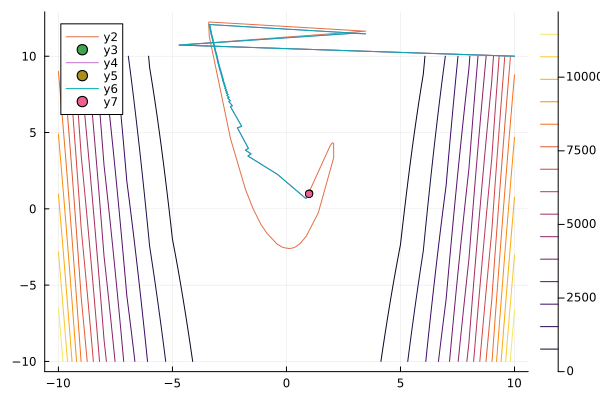

In [21]:
x_min, hist = FR(banan, start1, 0.01, 0.0001)
contour(xs1, ys1, banan)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = PR(banan, start1, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = Dicson(banan, start1, 0.01, 0.0001)
contour(xs1, ys1, banan)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = HS(banan, start1, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = Dayan(banan, start1, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])

6
18
6
15
15


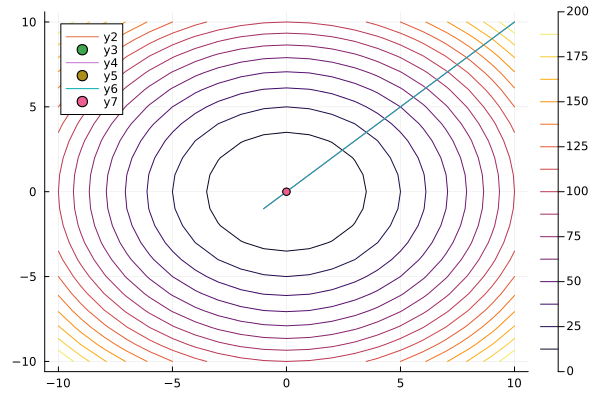

In [24]:
x_min, hist = FR(rastrigin, start1, 0.01, 0.0001)
contour(xs1, ys1, rastrigin)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = PR(rastrigin, start1, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = Dicson(rastrigin, start1, 0.01, 0.0001)
contour(xs1, ys1, rastrigin)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = HS(rastrigin, start1, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = Dayan(rastrigin, start1, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])

11
21
13
10
10


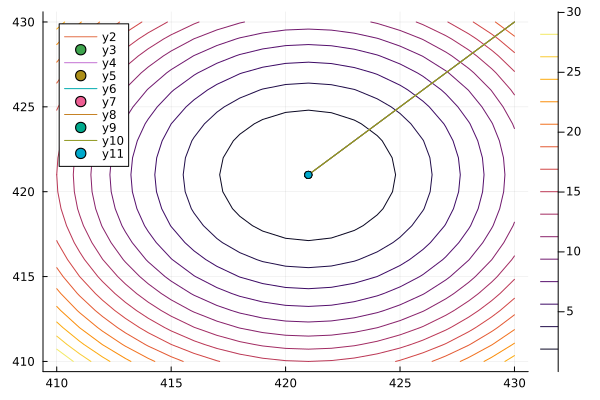

In [23]:
x_min, hist = FR(schwefel, start2, 0.01, 0.0001)
contour(xs2, ys2, schwefel)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = PR(schwefel, start2, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = Dicson(schwefel, start2, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = HS(schwefel, start2, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])
x_min, hist = Dayan(schwefel, start2, 0.01, 0.0001)
println(length(hist))
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist])
scatter!([x_min[1]], [x_min[2]])